## Data Setup

Library imports
___

In [14]:
from babel.numbers import format_currency as fc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

Data import and declaration
___

In [15]:
mcu_csv = pd.read_csv("./mcu_box_office.csv")

In [16]:
mcu = pd.DataFrame(data=mcu_csv)

mcu.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


Rename columns
___


In [17]:
mcu.columns

Index(['movie_title', 'mcu_phase', 'release_date', 'tomato_meter',
       'audience_score', 'movie_duration', 'production_budget',
       'opening_weekend', 'domestic_box_office', 'worldwide_box_office'],
      dtype='object')

In [18]:
mcu.columns = ['Film', 'Phase', 'Release Date', 'Critical Reception', 'Audience Reception', 'Length', 'Budget', 'Opening Weekend Gross', 'Domestic Gross', 'Worldwide Gross']

In [19]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Film                   27 non-null     object
 1   Phase                  27 non-null     int64 
 2   Release Date           27 non-null     object
 3   Critical Reception     27 non-null     int64 
 4   Audience Reception     27 non-null     int64 
 5   Length                 27 non-null     int64 
 6   Budget                 27 non-null     object
 7   Opening Weekend Gross  27 non-null     object
 8   Domestic Gross         27 non-null     object
 9   Worldwide Gross        27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


Shortening some of the longer titles
___

In [20]:
mcu.at[4,'Film']='Captain America'
mcu.at[8,'Film']='The Winter Soldier'
mcu.at[10,'Film']='Age of Ultron'
mcu.at[12,'Film']='Civil War'
mcu.at[18,'Film']='Infinity War'
mcu.at[21,'Film']='Endgame'
mcu.at[24,'Film']='Shang-Chi'

Setting the index as the Film column
___

In [21]:
mcu=mcu.set_index('Film')

In [22]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Iron Man to Spider-Man: No Way Home
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Phase                  27 non-null     int64 
 1   Release Date           27 non-null     object
 2   Critical Reception     27 non-null     int64 
 3   Audience Reception     27 non-null     int64 
 4   Length                 27 non-null     int64 
 5   Budget                 27 non-null     object
 6   Opening Weekend Gross  27 non-null     object
 7   Domestic Gross         27 non-null     object
 8   Worldwide Gross        27 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.1+ KB


In [23]:
mcu

,Phase,Release Date,Critical Reception,Audience Reception,Length,Budget,Opening Weekend Gross,Domestic Gross,Worldwide Gross
Film,,,,,,,,,
Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
Captain America,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"
The Avengers,1,5/4/2012,91,91,143,"225,000,000","207,438,708","623,357,910","1,515,100,211"
Iron Man 3,2,5/3/2013,79,78,130,"200,000,000","174,144,585","408,992,272","1,215,392,272"
Thor: The Dark World,2,11/8/2013,66,75,111,"150,000,000","85,737,841","206,362,140","644,602,516"
The Winter Soldier,2,4/4/2014,90,92,135,"170,000,000","95,023,721","259,746,958","714,401,889"


In [24]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Iron Man to Spider-Man: No Way Home
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Phase                  27 non-null     int64 
 1   Release Date           27 non-null     object
 2   Critical Reception     27 non-null     int64 
 3   Audience Reception     27 non-null     int64 
 4   Length                 27 non-null     int64 
 5   Budget                 27 non-null     object
 6   Opening Weekend Gross  27 non-null     object
 7   Domestic Gross         27 non-null     object
 8   Worldwide Gross        27 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.1+ KB


<AxesSubplot:xlabel='Length', ylabel='Critical Reception'>

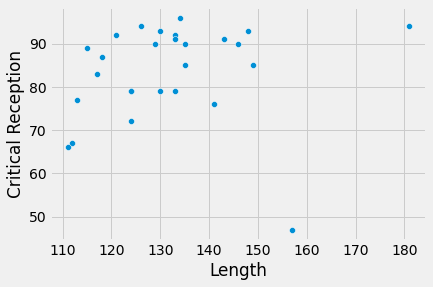

In [25]:
sns.scatterplot(x='Length',y='Critical Reception',data=mcu)

Converting values to appear as either currency or percentages [to be completed]
___

In [26]:
mcu['Budget'] = mcu['Budget'].apply(lambda x: fc(x, currency="USD", locale="en_US"))
mcu['Opening Weekend Gross'] = mcu['Opening Weekend Gross'].apply(lambda x: fc(x, currency="USD", locale="en_US"))
mcu['Domestic Gross'] = mcu['Domestic Gross'].apply(lambda x: fc(x, currency="USD", locale="en_US"))
mcu['Worldwide Gross'] = mcu['Worldwide Gross'].apply(lambda x: fc(x, currency="USD", locale="en_US"))

InvalidOperation: [<class 'decimal.ConversionSyntax'>]

In [ ]:
mcu

In [ ]:
mcu.info()

Breaking the larger table into smaller tables, based on the phase of the MCU the film belongs to
___

In [ ]:
phase1 = mcu[(mcu['Phase'] == 1)]
phase2 = mcu[(mcu['Phase'] == 2)]
phase3 = mcu[(mcu['Phase'] == 3)]
phase4 = mcu[(mcu['Phase'] == 4)]

In [ ]:
phase1

In [ ]:
phase2

In [ ]:
phase3

In [ ]:
phase4

Since the tables are all based on which phase the film was released in, we don't need the `phase` column anymore
___

In [ ]:
phase1 = phase1.drop("Phase",axis=1)
phase2 = phase2.drop("Phase",axis=1)
phase3 = phase3.drop("Phase",axis=1)
phase4 = phase4.drop("Phase",axis=1)

In [ ]:
phase1.info()

# Fuckin about

Let's see if audience or critical reception has any effect on worldwide gross
___

In [ ]:
critGross1 = phase1.drop(["Release Date","Length","Budget"], axis=1)
critGross2 =  phase2.drop(["Release Date","Length","Budget"], axis=1)
critGross3 =  phase3.drop(["Release Date","Length","Budget"], axis=1)
critGross4 =  phase4.drop(["Release Date","Length","Budget"], axis=1)

critGross1

In [ ]:
# critGross1['Critical Reception','Audience Reception'].plot(kind="bar")
critGross1.plot(y=["Critical Reception","Audience Reception"], kind="bar")

plt.title("Phase 1")
plt.xlabel("Films")
plt.ylabel("Reception (via Rotten Tomatoes")
plt.show()

In [ ]:
critGross1.plot(y=["Opening Weekend Gross","Domestic Gross"], kind="bar")

plt.title("Phase 1 Returns")
plt.xlabel("Films")
plt.ylabel("Gross (USD)")
plt.show()

In [ ]:
critGross2.plot(y=["Critical Reception","Audience Reception"], kind="bar")

plt.title("Phase 2")
plt.xlabel("Films")
plt.ylabel("Reception (via Rotten Tomatoes")
plt.show()

In [ ]:
critGross3.plot(y=["Critical Reception","Audience Reception"], kind="bar")

plt.title("Phase 3")
plt.xlabel("Films")
plt.ylabel("Reception (via Rotten Tomatoes")
plt.show()

In [ ]:
critGross4.plot(y=["Critical Reception","Audience Reception"], kind="bar")

plt.title("Phase 4")
plt.xlabel("Films")
plt.ylabel("Reception (via Rotten Tomatoes")
plt.show()